In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as mpt

In [34]:
A = [1,2,3,4,5,6]
B = [13,21,34]
A.extend(B)
print(A)

[1, 2, 3, 4, 5, 6, 13, 21, 34]


In [36]:
C = [1,2,3,4,5,6]
D = [13,21,34]
C.append(D)
print(C)

[1, 2, 3, 4, 5, 6, [13, 21, 34]]


In [2]:
#url with dataset for analysis
url = "https://raw.githubusercontent.com/WalePhenomenon/climate_change/master/fuel_ferc1.csv"

In [3]:
fuel_data = pd.read_csv(url, error_bad_lines=False)
fuel_data.describe(include='all')

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
count,29523,29523.000000,29523.000000,29523,29523,29343,2.952300e+04,29523.000000,29523.000000,2.952300e+04,29523.000000
unique,29523,NaN,NaN,2315,6,9,NaN,NaN,NaN,NaN,NaN
top,f1_fuel_2013_12_146_0_7,NaN,NaN,big stone,gas,mcf,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,156,11486,11354,NaN,NaN,NaN,NaN,NaN
mean,NaN,118.601836,2005.806050,NaN,NaN,NaN,2.622119e+06,8.492111,208.649031,9.175704e+02,19.304354
std,NaN,74.178353,7.025483,NaN,NaN,NaN,9.118004e+06,10.600220,2854.490090,6.877593e+04,2091.540939
min,NaN,1.000000,1994.000000,NaN,NaN,NaN,1.000000e+00,0.000001,-276.080000,-8.749370e+02,-41.501000
25%,NaN,55.000000,2000.000000,NaN,NaN,NaN,1.381700e+04,1.024000,5.207000,3.778500e+00,1.940000
50%,NaN,122.000000,2006.000000,NaN,NaN,NaN,2.533220e+05,5.762694,26.000000,1.737100e+01,4.127000
75%,NaN,176.000000,2012.000000,NaN,NaN,NaN,1.424034e+06,17.006000,47.113000,4.213700e+01,7.745000


In [52]:
mean = fuel_data["fuel_qty_burned"].mean()
std = fuel_data["fuel_qty_burned"].std()
num = fuel_data["fuel_qty_burned"].sum()
data = fuel_data["fuel_qty_burned"]

In [56]:
f = []
for x in data:
    f.append((x-mean)**4/num)
final = sum(f)/(std**4)
print(final)

0.0002494984096107607


In [4]:
#check for missing values
fuel_data.isnull().sum()

record_id                         0
utility_id_ferc1                  0
report_year                       0
plant_name_ferc1                  0
fuel_type_code_pudl               0
fuel_unit                       180
fuel_qty_burned                   0
fuel_mmbtu_per_unit               0
fuel_cost_per_unit_burned         0
fuel_cost_per_unit_delivered      0
fuel_cost_per_mmbtu               0
dtype: int64

In [5]:
#create a dummy
data_dummy=pd.get_dummies(fuel_data)

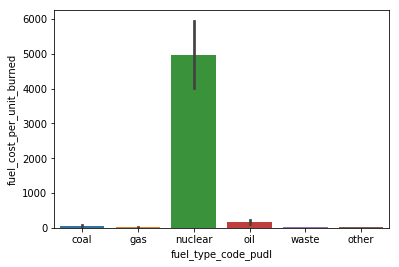

In [17]:
sns.barplot(data=fuel_data, x='fuel_type_code_pudl', y='fuel_cost_per_unit_burned')

(1, 12000)

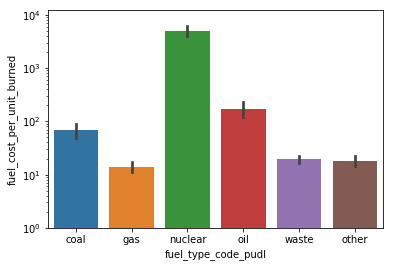

In [20]:
g = sns.barplot(data=fuel_data, x='fuel_type_code_pudl', y='fuel_cost_per_unit_burned')
g.set_yscale("log")
g.set_ylim(1,12000)

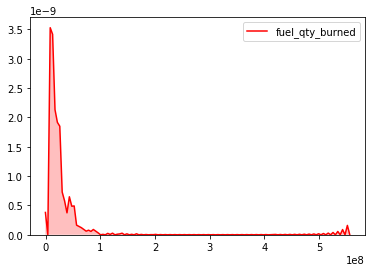

In [21]:
sns.kdeplot(fuel_data["fuel_qty_burned"], shade=True, color="r")

(1, 20000)

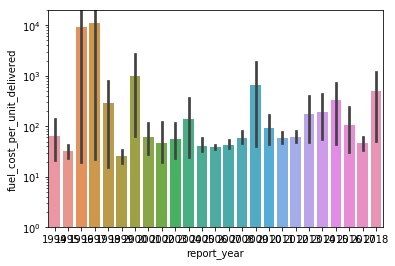

In [27]:
c=sns.barplot(data=fuel_data, x='report_year', y='fuel_cost_per_unit_delivered')
c.set_yscale("log")
c.set_ylim(1,20000)

In [39]:
fuel_1=fuel_data.groupby("fuel_type_code_pudl")

In [38]:
fuel_1

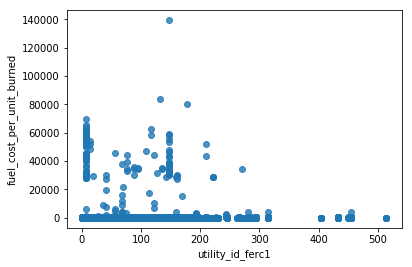

In [40]:
sns.regplot(x=fuel_data['utility_id_ferc1'], y=fuel_data["fuel_cost_per_unit_burned"], fit_reg=False)

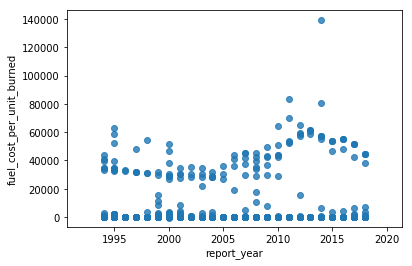

In [42]:
sns.regplot(x=fuel_data['report_year'], y=fuel_data["fuel_cost_per_unit_burned"], fit_reg=False)

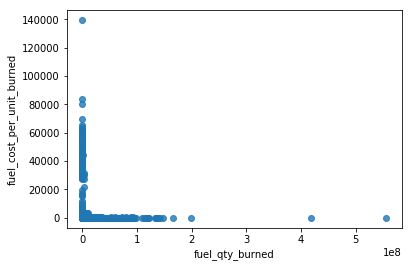

In [43]:
sns.regplot(x=fuel_data['fuel_qty_burned'], y=fuel_data["fuel_cost_per_unit_burned"], fit_reg=False)

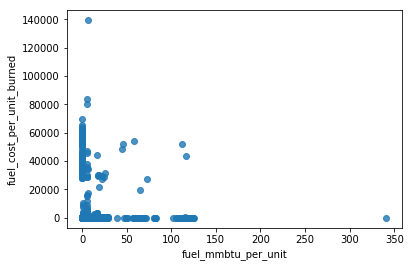

In [44]:
sns.regplot(x=fuel_data['fuel_mmbtu_per_unit'], y=fuel_data["fuel_cost_per_unit_burned"], fit_reg=False)

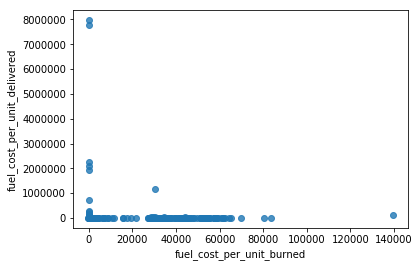

In [46]:
sns.regplot(x=fuel_data['fuel_cost_per_unit_burned'], y=fuel_data["fuel_cost_per_unit_delivered"], fit_reg=False)

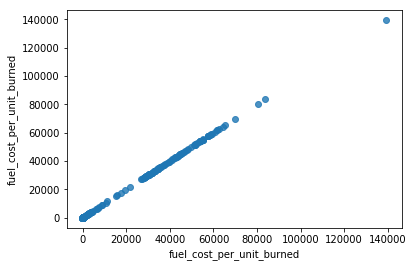

In [47]:
sns.regplot(x=fuel_data['fuel_cost_per_unit_burned'], y=fuel_data["fuel_cost_per_unit_burned"], fit_reg=False)